<h1><center>Natural Computing, Experimenting with Genetic Programming</center></h1>
<center>Frederik Kelbel, s1653529</center>

## Set-up

I decided against seeding since the results could heavily depend on a good seed, depending on the parameters. It also has negative repurcussions on diversity, if the seed is kept the same during the evolution process. One could make the seed an inheritable trait/gene. The experiments do not cover this.

In [1]:
from Callables import find_prime_polynomial
from Chromosomes import Fitness, Poly_Chrom, Tree_Chrom
from Population import Poly_Population, Tree_Population, Tree_SimAnnealing_Population
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_final_polynomials(pop, test_interval):
    print("Surviving polynomial: ")
    p = pop.polynomials[0]
    print(p.print_gp_polynomial())
    print("On test interval {0} the polynomial produced {1} primes. \nIt had a maximum of {2} "
          "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
          "\nIts fitness score is {5}.\n"
          .format(test_interval, p.num_primes_fitness_in_interval(test_interval),
                  p.num_consecutive_primes_fitness_in_interval(test_interval),
                  test_interval[0],
                  p.num_consecutive_primes_fitness(test_interval),
                  p.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                   Fitness.number_of_primes_in_interval,
                                                   Fitness.number_of_consecutive_primes])))

def show_average_fitness(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time)
    fig.savefig(save_as)
    plt.show()
    
def show_average_fitness_comparison(pops, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(211)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    for pop in pops:
        ax.plot(range(len(pop.average_fitness_over_time)), pop.average_fitness_over_time, label=str(type(pop).__name__))
    ax.legend(loc='best')
    fig.savefig(save_as)
    plt.show()
    
def show_scatter_fitness(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Fitness')
    for i in range(len(pop.fitness_over_time)):
        plt.scatter(np.tile([i], len(pop.fitness_over_time[i])), pop.fitness_over_time[i], s=0.8)
    fig.savefig(save_as)
    plt.show()
    
def show_scatter_fitness_comparison(pops, save_as):
    num_plots = len(pops)
    fig, axs = plt.subplots(num_plots, figsize=(8, 10))
    fig.suptitle('Fitness comparison')
    for k in range(num_plots):
            for i in range(len(pops[k].fitness_over_time)):
                axs[k].set_ylabel('Fitness')
                axs[k].set_xlabel('Generations')
                axs[k].scatter(np.tile([i], len(pops[k].fitness_over_time[i])), pops[k].fitness_over_time[i], s=0.8)
    fig.savefig(save_as)
    plt.show()
    
def show_bar_before_after_comparison(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    ax.bar(np.array(range(len(pop.average_fitness_over_time))) - 0.1, pop.average_fitness_over_time, 0.2, label="Before selection/After Replenish")
    ax.bar(np.array(range(len(pop.average_fitness_over_time)-1)) + 0.1, pop.average_fitness_over_time_replenish, 0.2, label="After selection/Before Replenish")
    ax.legend(loc='best')
    fig.savefig(save_as)
    plt.show()
    
def show_bar_before_after_comparison_simAnn(pop, save_as):
    fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_ylabel('Fitness')
    ax.set_xlabel('Generations')
    ax.set_title('Average Fitness')
    ax.bar(np.array(range(len(pop.average_fitness_over_time)))-0.26,pop.average_fitness_over_time, 0.25, label="Before selection/After Sim. Ann.")
    ax.bar(np.array(range(len(pop.average_fitness_over_time)-1)),pop.average_fitness_over_time_replenish, 0.25, label="After selection/Before Replenish")
    ax.bar(np.array(range(len(pop.average_fitness_over_time)-1))+ 0.26,pop.average_fitness_over_time_simAnn, 0.25, label="After Replenish/Before Sim. Ann.")
    ax.legend(loc='best')
    fig.savefig(save_as)
    plt.show()

## Poly-Population

<h3>Baseline</h3>
This serves as a reference for comparisons and reproduction. The test interval is the input interval. Hence, in theory we could produce up to 200 primes on our test interval.

In [5]:
test_interval=(0, 200)
baseline1 = Poly_Chrom(np.array([17, 1, 1]))
baseline2 = Poly_Chrom(np.array([41, 1, 1]))
print("x^2 + x^1 + 17: ")
print("On test interval {0} the first baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline1.num_primes_fitness_in_interval(test_interval),
              baseline1.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline1.num_consecutive_primes_fitness(test_interval),
              baseline1.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("x^2 + x^1 + 41: ")
print("On test interval {0} the second baseline produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, baseline2.num_primes_fitness_in_interval(test_interval),
              baseline2.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              baseline2.num_consecutive_primes_fitness(test_interval),
              baseline2.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))

x^2 + x^1 + 17: 
On test interval (0, 200) the first baseline produced 105 primes. 
It had a maximum of 16 consecutive primes on the test interval. 
Starting at 0, it had 16 consecutive primes. 
Its fitness score is 137.

x^2 + x^1 + 41: 
On test interval (0, 200) the second baseline produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



<h3>Attempt to reproduce the second baseline with a GA. Establishing baseline parameters.</h3>

Chromosome: Poly_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 2
Surviving polynomial: 
(1.0)x^2 + (1.0)x^1 + (41.0)
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



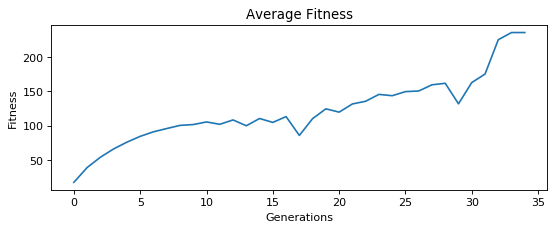

In [20]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 2
poly_pop_order_2 = find_prime_polynomial(Poly_Population, 
                                   [Fitness.number_of_consecutive_primes_in_interval,
                                    Fitness.number_of_primes_in_interval,
                                    Fitness.number_of_consecutive_primes],
                                   num_populations=num_populations, merge_point=merge_point, 
                                   population_size=population_size, 
                                   test_interval=test_interval, birth_rate=birth_rate, 
                                   mutation=mutation, coeffs_bound=coeffs_bound,
                                        constraint=constraint)
show_final_polynomials(poly_pop_order_2, test_interval)
show_average_fitness(poly_pop_order_2, "reproduction_ga.pdf")

## Tree-Population

In [7]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 1.5 # actual depth limit is always 2*constraint
tree_pop_depth_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 1.5


Surviving polynomial: 
add(multiply(x, x), add(41, x))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



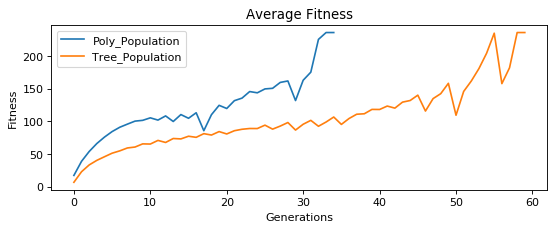

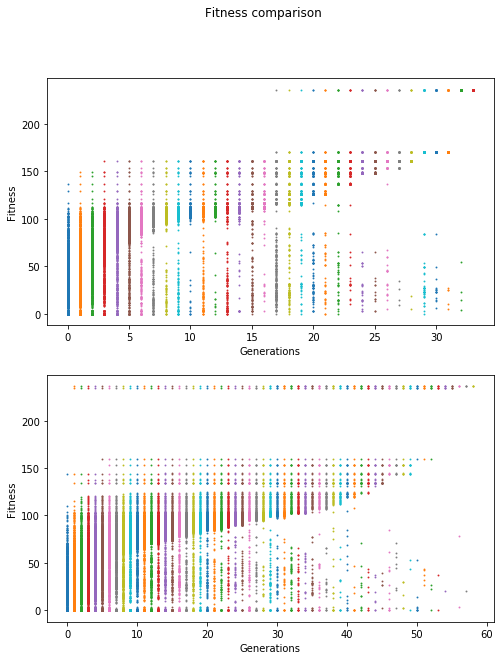

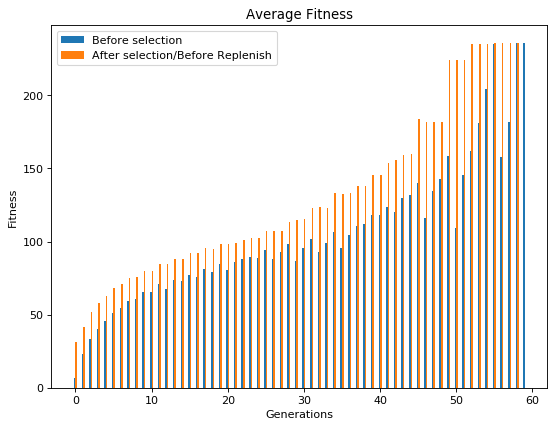

In [21]:
show_final_polynomials(tree_pop_depth_2, test_interval)
show_average_fitness_comparison([poly_pop_order_2, tree_pop_depth_2], "tree_ga_comparison.pdf")
show_scatter_fitness_comparison([poly_pop_order_2, tree_pop_depth_2], "tree_ga_2_comparison.pdf")
show_bar_before_after_comparison(tree_pop_depth_2, "tree_phases.pdf")

### Increasing search space

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(add(x, multiply(x, add(13, x))), add(x, -53))
On test interval (0, 200) the polynomial produced 128 primes. 
It had a maximum of 17 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 145.



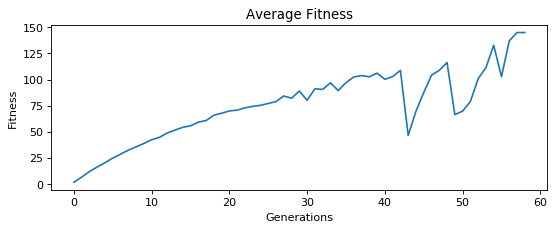

In [7]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_1 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_1, test_interval)
show_average_fitness(tree_pop_custom_1, "custom_tree_1.pdf")

### Introducing multiple populations

Chromosome: Tree_Population, Amount of populations: 3, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(add(multiply(x, -34), add(-57, add(add(add(-14, x), multiply(x, x)), x))), multiply(x, x))
On test interval (0, 200) the polynomial produced 137 primes. 
It had a maximum of 17 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 154.



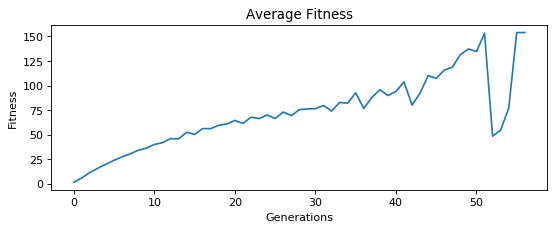

In [21]:
num_populations=3
merge_point=0.4
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_2, test_interval)
show_average_fitness(tree_pop_custom_2, "custom_tree_2.pdf")

### High vs low mutation

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.5, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(add(multiply(15, x), add(add(add(38, x), add(34, -38)), add(add(30, -47), multiply(x, x)))), add(add(multiply(1, x), multiply(29, x)), add(add(-14, x), add(39, 47))))
On test interval (0, 200) the polynomial produced 104 primes. 
It had a maximum of 5 consecutive primes on the test interval. 
Starting at 0, it had 2 consecutive primes. 
Its fitness score is 111.

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.01, Coeffs-bound: (-61, 62), Constraint: 2.5
Surviving polynomial: 
add(multiply(add(-4, x), add(x, x)), 37)
On test interval (0, 200) the polynomial produced 132 primes. 
It had a maximum of 29 consecutive primes on the test interval. 
Starting at 0, it had 31 consecutive primes. 
Its 

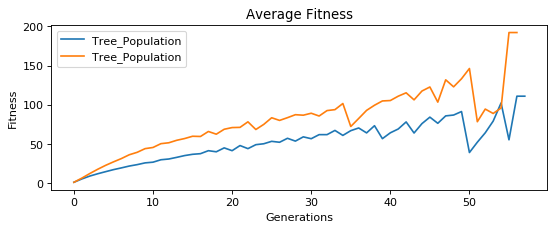

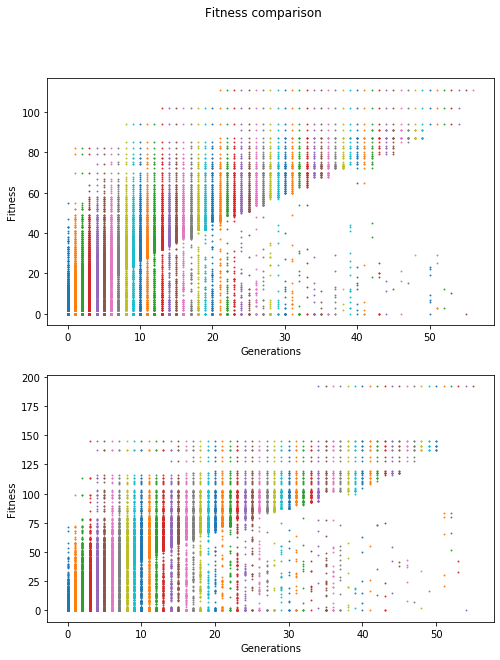

In [22]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.5
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_3 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_3, test_interval)
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.01
coeffs_bound = (-61, 62)
constraint = 2.5
tree_pop_custom_4 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_custom_4, test_interval)
show_average_fitness_comparison([tree_pop_custom_3, tree_pop_custom_4], "tree_mutation_comparison.pdf")
show_scatter_fitness_comparison([tree_pop_custom_3, tree_pop_custom_4], "tree_mutation_2_comparison.pdf")

### Tree-Population, Experimenting with different functions

I will introduce some custom functions to use in the Tree_Population.

In [3]:
def add(x, y):
    return np.add(x, y)


def multiply(x, y):
    return np.multiply(x, y)

def maximum(x, y):
    return np.maximum(x, y)

def minimum(x, y):
    return np.minimum(x, y)

def mod(x, y): # Will return warning whenever y is equivalent to 0. It then returns 0
    return np.mod(x, y)

def sinleft(x, y):
    return np.add(np.sin(x), y)

def sinright(x, y):
    return np.add(np.sin(y), x)


Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
minimum(minimum(maximum(mod(minimum(x, x), mod(x, -45)), minimum(minimum(-38, 2), minimum(-36, x))), minimum(minimum(mod(x, 50), maximum(x, x)), minimum(mod(x, x), minimum(-36, x)))), mod(maximum(maximum(minimum(x, -24), minimum(x, 37)), minimum(maximum(x, -35), minimum(x, -35))), maximum(minimum(minimum(x, x), mod(x, x)), mod(minimum(x, -59), mod(x, 3)))))
On test interval (0, 200) the polynomial produced 46 primes. 
It had a maximum of 2 consecutive primes on the test interval. 
Starting at 0, it had 1 consecutive primes. 
Its fitness score is 49.



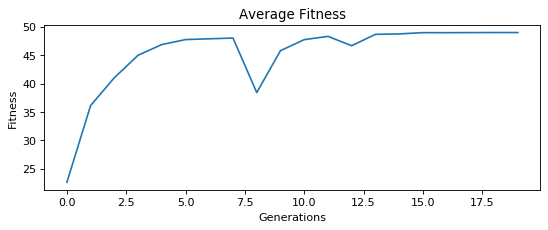

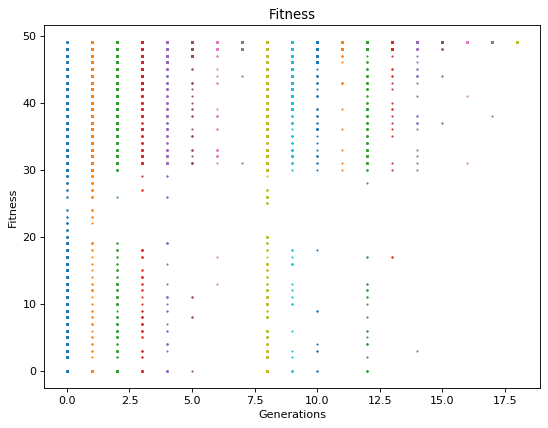

In [4]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
operator_functions=[maximum, minimum, mod]
tree_pop_exp_custom = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom, test_interval)
show_average_fitness(tree_pop_exp_custom, "function_exp_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom, "function_exp_2_tree.pdf")

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
minimum(add(maximum(minimum(-23, x), add(maximum(-44, 20), multiply(x, x))), maximum(multiply(mod(x, 5), minimum(-8, x)), multiply(maximum(x, 32), maximum(47, -9)))), add(maximum(minimum(x, x), multiply(x, x)), maximum(mod(minimum(x, x), mod(multiply(x, 8), minimum(52, -30))), minimum(add(x, 41), add(maximum(maximum(add(-11, x), add(x, 41)), add(multiply(x, -15), maximum(x, -21))), mod(add(multiply(-33, x), mod(9, x)), mod(mod(x, x), maximum(x, x))))))))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



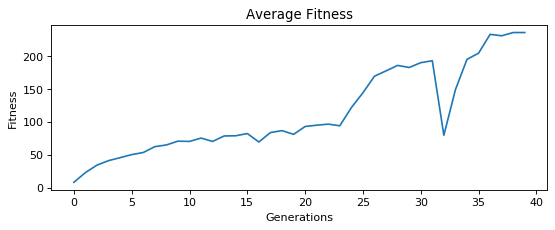

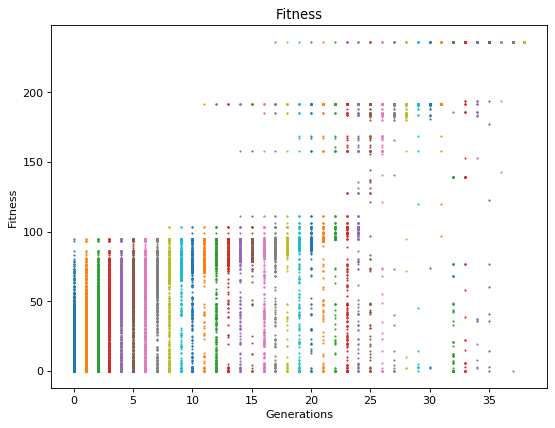

In [6]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
operator_functions=[add, multiply, maximum, minimum, mod]
tree_pop_exp_custom_2 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom_2, test_interval)
show_average_fitness(tree_pop_exp_custom_2, "function_exp_21_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom_2, "function_exp_22_tree.pdf")

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 5000, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (-61, 62), Constraint: 2.5


/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app


Surviving polynomial: 
maximum(add(maximum(add(add(54, -26), maximum(x, x)), maximum(add(41, x), add(add(multiply(maximum(x, 16), add(-52, -60)), mod(add(50, 6), multiply(x, x))), mod(add(multiply(-26, 20), maximum(x, 29)), mod(mod(x, 2), multiply(51, x)))))), maximum(maximum(multiply(x, x), maximum(x, x)), maximum(maximum(maximum(x, x), mod(x, 12)), maximum(-34, x)))), add(maximum(multiply(maximum(1, 15), maximum(x, x)), mod(mod(x, 53), maximum(maximum(-9, 11), maximum(x, x)))), add(x, -46)))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



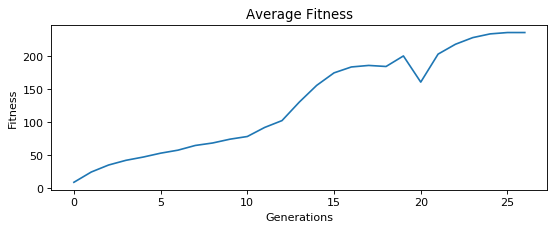

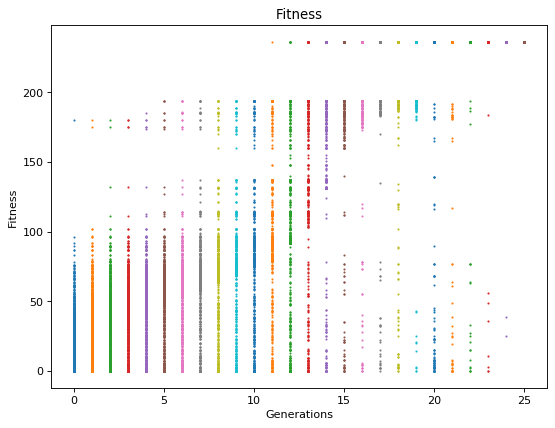

In [14]:
num_populations=1
merge_point=0.5
population_size=5000
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (-61, 62)
constraint = 2.5
operator_functions=[add, multiply, maximum, maximum, mod]
tree_pop_exp_custom_3 = find_prime_polynomial(Tree_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)
show_final_polynomials(tree_pop_exp_custom_3, test_interval)
show_average_fitness(tree_pop_exp_custom_3, "function_exp_31_tree.pdf")
show_scatter_fitness(tree_pop_exp_custom_3, "function_exp_32_tree.pdf")

/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in remainder
  from ipykernel import kernelapp as app
/home/frederik/anaconda3/envs/natCom/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in remainder
  from ipykernel import kernelapp as app


On test interval (0, 200) the tree produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.

Numbers produced:  [   41    43    47    53    61    71    83    97   113   131   151   173
   197   223   251   281   313   347   383   421   461   503   547   593
   641   691   743   797   853   911   971  1033  1097  1163  1231  1301
  1373  1447  1523  1601  1681  1763  1847  1933  2021  2111  2203  2297
  2393  2491  2591  2693  2797  2903  3011  3121  3233  3347  3463  3581
  3701  3823  3947  4073  4201  4331  4463  4597  4733  4871  5011  5153
  5297  5443  5591  5741  5893  6047  6203  6361  6521  6683  6847  7013
  7181  7351  7523  7697  7873  8051  8231  8413  8597  8783  8971  9161
  9353  9547  9743  9941 10141 10343 10547 10753 10961 11171 11383 11597
 11813 12031 12251 12473 12697 12923 13151 13381 13613 13847 14083 14321
 14561 14803 15047 15293 15541 15791 16043 16297 16553 1

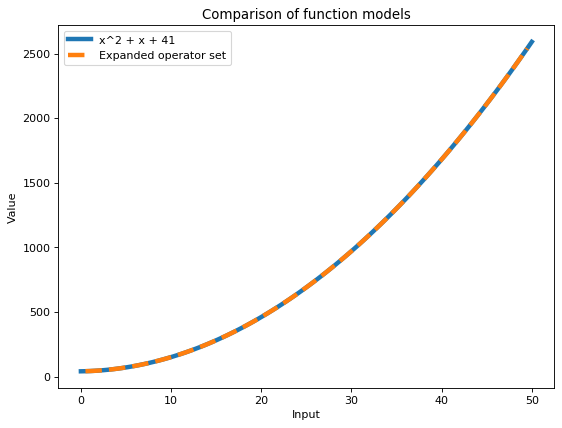

In [21]:
print("On test interval {0} the tree produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, tree_pop_exp_custom_2.polynomials[0].num_primes_fitness_in_interval(test_interval),
              tree_pop_exp_custom_2.polynomials[0].num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              tree_pop_exp_custom_2.polynomials[0].num_consecutive_primes_fitness(test_interval),
             tree_pop_exp_custom_2.polynomials[0].primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                        Fitness.number_of_primes_in_interval,
                                        Fitness.number_of_consecutive_primes])))
print("Numbers produced: ", tree_pop_exp_custom_2.polynomials[0].eval_polynomial(np.array(range(0, 200))))
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_ylabel('Value')
ax.set_xlabel('Input')
ax.set_title('Comparison of function models')
x_stuff = np.linspace(0.0, 50.0, num=100)
ax.plot(x_stuff, Poly_Chrom(np.array([41, 1, 1])).eval_polynomial(x_stuff), label=str("x^2 + x + 41"), linewidth=4.0)
ax.plot(x_stuff, tree_pop_exp_custom_3.polynomials[0].eval_polynomial(x_stuff), label=str("Expanded operator set"), linestyle="--", linewidth=4.0)
ax.legend(loc='best')
fig.savefig("extension_function.pdf")
plt.show()

### What happens if we integrate Simulated Annealing to the initialisation process?

In [15]:
import copy
import math
from Chromosomes import Tree_Terminal

def simulated_annealing(original_polynomial, max_iterations=1000, max_temp=100000, temp_change=0.98):
    if isinstance(original_polynomial, Tree_Chrom):
        current_polynomial = copy.deepcopy(original_polynomial)
        best_polynomial = original_polynomial
        i_polynomial = copy.deepcopy(current_polynomial)
        terminals = i_polynomial.return_terminals()
        for _ in range(max_iterations):
            terminals = np.array([t.go_to_neighbour(50) for t in terminals])
            max_temp = max_temp * temp_change
            i_cost = annealing_cost(i_polynomial)
            current_cost = annealing_cost(current_polynomial)
            prob = math.exp((current_cost-i_cost)/max_temp)
            if i_cost <= current_cost:
                current_polynomial = copy.deepcopy(i_polynomial)
                if i_cost <= annealing_cost(best_polynomial):
                    best_polynomial = copy.deepcopy(i_polynomial)
            elif np.random.choice([True, False], p=[prob, 1-prob]):
                current_polynomial = copy.deepcopy(i_polynomial)
        return best_polynomial
    return original_polynomial

def annealing_cost(polynomial):
    return 1/(1+polynomial.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                       Fitness.number_of_primes_in_interval,
                                                       Fitness.number_of_consecutive_primes]))

poly = Tree_Chrom()
print("On test interval {0} poly produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, poly.num_primes_fitness_in_interval(test_interval),
              poly.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              poly.num_consecutive_primes_fitness(test_interval),
              poly.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                  Fitness.number_of_primes_in_interval,
                                                  Fitness.number_of_consecutive_primes])))
poly = simulated_annealing(poly)
print("On test interval {0} poly produced {1} primes. \nIt had a maximum of {2} "
      "consecutive primes on the test interval. \nStarting at {3}, it had {4} consecutive primes. "
      "\nIts fitness score is {5}.\n"
      .format(test_interval, poly.num_primes_fitness_in_interval(test_interval),
              poly.num_consecutive_primes_fitness_in_interval(test_interval),
              test_interval[0],
              poly.num_consecutive_primes_fitness(test_interval),
              poly.primes_fitness(test_interval, [Fitness.number_of_consecutive_primes_in_interval,
                                                  Fitness.number_of_primes_in_interval,
                                                  Fitness.number_of_consecutive_primes])))

On test interval (0, 200) poly produced 0 primes. 
It had a maximum of 0 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 0.

On test interval (0, 200) poly produced 7 primes. 
It had a maximum of 1 consecutive primes on the test interval. 
Starting at 0, it had 0 consecutive primes. 
Its fitness score is 8.



### Attempt to generate the best polynomial with a smaller population, reliably

Chromosome: Tree_SimAnnealing_Population, Amount of populations: 1, Population-size: 500, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 1.5
Surviving polynomial: 
add(add(x, -9), add(add(-147, 197), multiply(x, x)))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 40 consecutive primes on the test interval. 
Starting at 0, it had 40 consecutive primes. 
Its fitness score is 236.



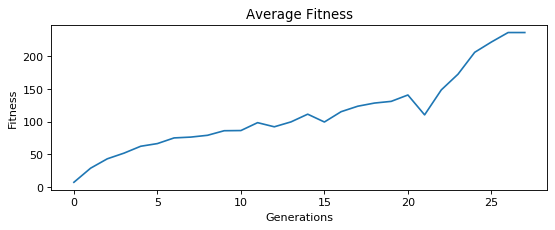

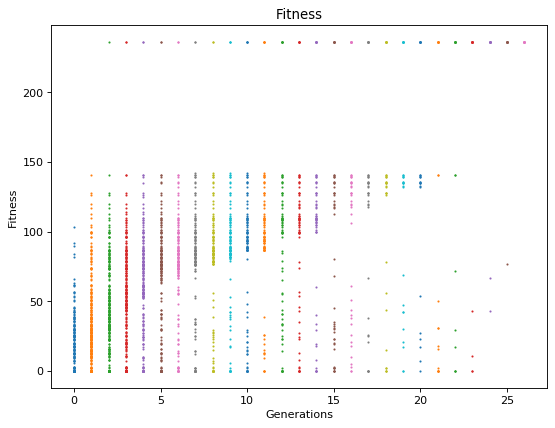

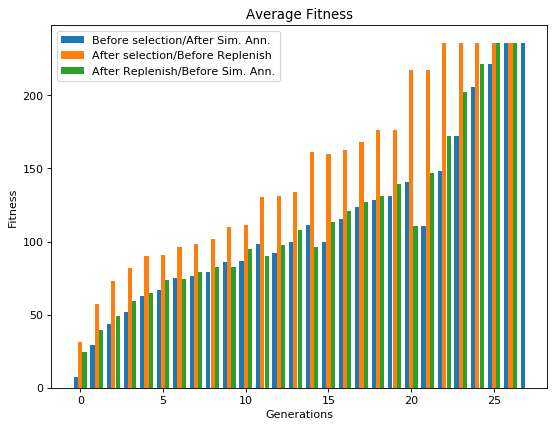

In [4]:
test_interval=(0, 200)
num_populations=1
merge_point=0.5
population_size=500
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 1.5
tree_pop_exp_custom_4 = find_prime_polynomial(Tree_SimAnnealing_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_exp_custom_4, test_interval)
show_average_fitness(tree_pop_exp_custom_4, "Tree_simAnn_average.pdf")
show_scatter_fitness(tree_pop_exp_custom_4, "Tree_simAnn_scatter.pdf")
show_bar_before_after_comparison_simAnn(tree_pop_exp_custom_4, "Tree_simAnn_bars.pdf")

Chromosome: Tree_SimAnnealing_Population, Amount of populations: 1, Population-size: 500, 
Test-interval: (0, 200), Birth-rate: 0.7, Mutation-rate: 0.1, Coeffs-bound: (1, 42), Constraint: 2
Surviving polynomial: 
add(add(add(add(-102, 57), multiply(x, x)), add(add(350, x), add(-7, -260))), add(x, add(5, x)))
On test interval (0, 200) the polynomial produced 156 primes. 
It had a maximum of 39 consecutive primes on the test interval. 
Starting at 0, it had 39 consecutive primes. 
Its fitness score is 234.



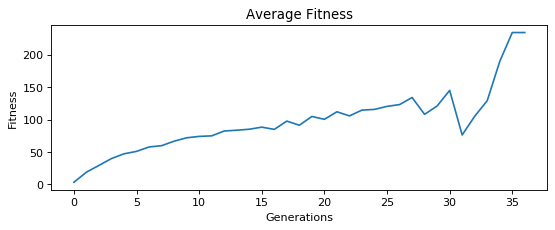

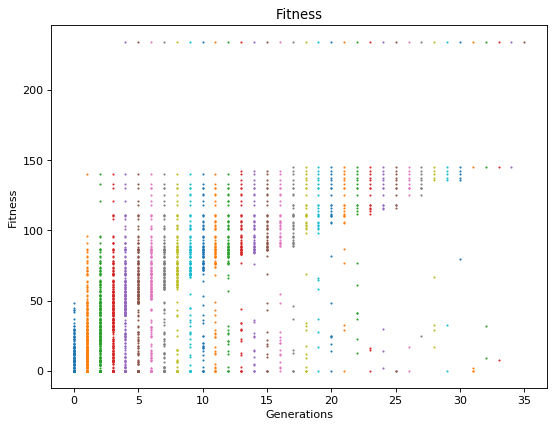

In [6]:
num_populations=1
merge_point=0.5
population_size=500
test_interval=(0, 200)
birth_rate=0.7
mutation=0.1
coeffs_bound = (1, 42)
constraint = 2
operator_functions=[add, multiply, maximum, maximum, mod]
tree_pop_exp_custom_5 = find_prime_polynomial(Tree_SimAnnealing_Population, 
                                [Fitness.number_of_consecutive_primes_in_interval,
                                Fitness.number_of_primes_in_interval,
                                Fitness.number_of_consecutive_primes],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint)
show_final_polynomials(tree_pop_exp_custom_5, test_interval)
show_average_fitness(tree_pop_exp_custom_5, "Tree_simAnn_best_1.pdf")
show_scatter_fitness(tree_pop_exp_custom_5, "Tree_simAnn_best_2.pdf")

## Time Series Prediction

In [5]:
from scipy.interpolate import interp1d
time_series = np.array([4.3, 2, 5.1986, 5.2, 5.3, 5.42, 2, -3, 2.98, -3.2, -2, -2.4, 7.4, 1.4, 6, 2.7575, 3, 3.186, 3.286, 0,
               0.234])
x_series = np.array(range(time_series.size))
f = interp1d(x_series, time_series, kind='quadratic')
x_new = np.linspace(0.0, x_series.size-1,100)
t_smooth=f(x_new)

num_populations=1
merge_point=0.5
population_size=30000
test_interval=(0, x_series.size)
birth_rate=0.7
mutation=0.02
coeffs_bound = (-50, 50)
constraint = 3.5
operator_functions=[add, multiply, sinleft, sinright]
tree_pop_time_series = find_prime_polynomial(Tree_Population, 
                                [Fitness.mse],
                                num_populations=num_populations, merge_point=merge_point, 
                                population_size=population_size, 
                                test_interval=test_interval, birth_rate=birth_rate, 
                                mutation=mutation, coeffs_bound=coeffs_bound,
                                         constraint=constraint, operator_functions=operator_functions)

Chromosome: Tree_Population, Amount of populations: 1, Population-size: 30000, 
Test-interval: (0, 21), Birth-rate: 0.7, Mutation-rate: 0.02, Coeffs-bound: (-50, 50), Constraint: 3.5


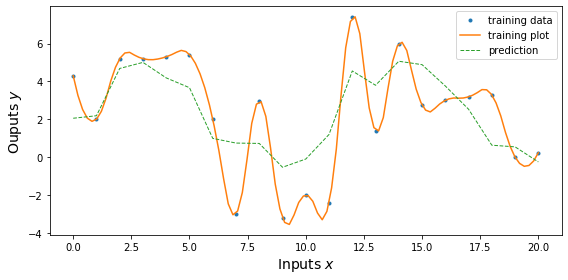

In [7]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.plot(x_series, time_series, '.', label='training data')
ax.plot(x_new, t_smooth, '-', label='training plot')
ax.plot(x_series, tree_pop_time_series.polynomials[0].eval_polynomial(x_series), label=str("prediction"), linestyle="--", linewidth=1.0)

ax.set_xlabel('Inputs $x$', fontsize=14)
ax.set_ylabel('Ouputs $y$', fontsize=14)
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("time_series.pdf")